## Import libraries

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score

%matplotlib inline

good documentation about loading boston data set
http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

In [102]:
boston=load_boston()

In [103]:
print(boston.data.shape)

(506, 13)


In [104]:
#X_full is a feature set and y_full is a taget value
X_full, y_full = boston.data, boston.target

In [105]:
#Number of houses in the dataset
n_samples = X_full.shape[0]
#Number of features in the dataset
n_features = X_full.shape[1]

In [106]:
print(n_samples)

506


In [107]:
print(n_features)

13


In [108]:
print(X_full)

[[  6.32000000e-03   1.80000000e+01   2.31000000e+00 ...,   1.53000000e+01
    3.96900000e+02   4.98000000e+00]
 [  2.73100000e-02   0.00000000e+00   7.07000000e+00 ...,   1.78000000e+01
    3.96900000e+02   9.14000000e+00]
 [  2.72900000e-02   0.00000000e+00   7.07000000e+00 ...,   1.78000000e+01
    3.92830000e+02   4.03000000e+00]
 ..., 
 [  6.07600000e-02   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.96900000e+02   5.64000000e+00]
 [  1.09590000e-01   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.93450000e+02   6.48000000e+00]
 [  4.74100000e-02   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.96900000e+02   7.88000000e+00]]


In [109]:
#Minimum house value
min_price=np.min(y_full)
print(min_price)

5.0


In [110]:
#Maximum house value
max_price=np.max(y_full)
print(max_price)

50.0


In [111]:
#Mean value
mean_price=np.mean(y_full)
print(mean_price)

22.5328063241


In [112]:
#Median value
median_price=np.median(y_full)
print(median_price)

21.2


In [113]:
#Standard deviation value
std_dev=np.std(y_full)
print(std_dev)

9.18801154528


In [114]:
# Create our client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

In [115]:
print(CLIENT_FEATURES)

[[11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]]


# Estimate the score on the entire dataset, with no missing values

A random forest regressor.

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

In [116]:
estimator = RandomForestRegressor(random_state=0, n_estimators=100)
score = cross_val_score(estimator, X_full, y_full).mean()
print("Score with the entire dataset = %.2f" % score)

Score with the entire dataset = 0.56


In [117]:
from sklearn.model_selection import ShuffleSplit
# Shuffle and split the data
rs = ShuffleSplit(506,test_size=.33, random_state=0) 
print(rs)

ShuffleSplit(n_splits=506, random_state=0, test_size=0.33, train_size=None)


Random permutation cross-validator

split data into training and test sets.
 
documentation about shufflesplit
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html

In [118]:
for train_index, test_index in rs.split(X_full):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train = X_full.take(train_index, axis=0)
    y_train = y_full[train_index]
    X_test = X_full.take(test_index, axis=0)
    y_test = y_full[test_index]
    print( "Successfully shuffled and split the data!")

TRAIN: [ 81 360 394 194 477 461 160 484 379 499 496 473  51 458 427 336 164 106
 325  63 348 186 433 445 263  89 315 268  93 301 465 311 282  92  18 261
 198 145 158 150 250 485 167  85 236 436  66 312 429 140 101 393   2 413
 221  17 146 255 357  30 114 238 103 456 313 176 252 116 168 441 120 264
 112 364 347 463 136 190 351 181 126 284  34 412 377 424 232 133  33 482
  44  61 199 271 289 218  73  35 444  29 365 345 457 217  27 467 295 156
 339 382 138 212 104 354 350 355 215 439 189 214 204 234 259  67  24 216
 223 129 111 166 422 399  40 274 361  79 316 318  13 287 414 500 228 161
  83 503 479 110 149 152  16 343 109 406 139 237 260 362 317 501 405 248
 332 390  19 328 296 269 226 434   3 353 125 280 286  77 184 380 483 275
 294 442 182 453  80 307 258  11 375  86 266  36 486  58  41 270  50 209
 402 401 421 123 222  62 381 130 187  23  43 447   0 201 368 432  98 349
 304 493 178 369 256  94 471  95 468 169  69 305  48 341 373 397 207 279
 227 148 143 334 180 356 131 454 504 262 324

In [119]:


from sklearn.metrics import mean_squared_error

def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """

    error = mean_squared_error(y_true, y_predict)
    return error


# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print ("Successfully performed a metric calculation!")
except:
    print ("Something went wrong with performing a metric calculation.")


Successfully performed a metric calculation!


In [120]:
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeRegressor


def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    scoring_function = make_scorer(mean_squared_error, greater_is_better = False)

    # Make the GridSearchCV object
    reg = GridSearchCV(regressor, 
                       param_grid = parameters,
                       scoring = scoring_function)

    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)

    # Return the optimal model
    return reg.best_estimator_


# Test fit_model on entire dataset
try:
    reg = fit_model(X_full, y_full)
    print ("Successfully fit a model!")
except:
    print ("Something went wrong with fitting a model.")


Successfully fit a model!


In [121]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print ("Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .")
    
    # Create the figure window
    fig = plt.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.rint(np.linspace(1, len(X_train), 50)).astype(int)
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

In [122]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print ("Creating a model complexity graph. . . ")

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    plt.figure(figsize=(7, 5))
    plt.title('Decision Tree Regressor Complexity Performance')
    plt.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    plt.plot(max_depth, train_err, lw=2, label = 'Training Error')
    plt.legend()
    plt.xlabel('Maximum Depth')
    plt.ylabel('Total Error')
    plt.show()

Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


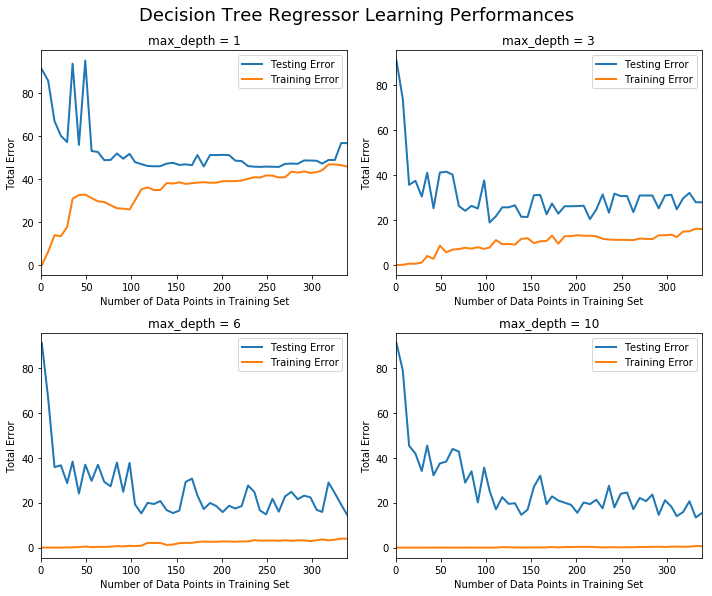

In [123]:
learning_curves(X_train, y_train, X_test, y_test)

Creating a model complexity graph. . . 


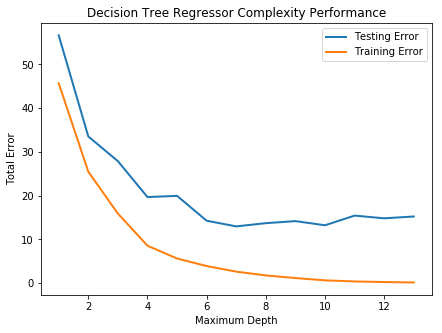

In [124]:
model_complexity(X_train, y_train, X_test, y_test)

In [125]:
print ("Final model has an optimal max_depth parameter of", reg.get_params()['max_depth'])

Final model has an optimal max_depth parameter of 4


In [126]:


sale_price = reg.predict(CLIENT_FEATURES)
print ("Predicted value of client's home: {0:.3f}".format(sale_price[0]))



Predicted value of client's home: 21.630


Plotting Cross-Validated Predictions¶
 how to use cross_val_predict to visualize prediction errors.
http://scikit-learn.org/stable/auto_examples/plot_cv_predict.html#sphx-glr-auto-examples-plot-cv-predict-py

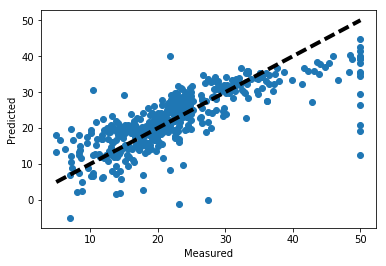

In [127]:

lr = linear_model.LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X_full, y_full, cv=10)

fig, ax = plt.subplots()
ax.scatter(y_full, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Gradient Boosting regression

In [136]:
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
X, y = shuffle(boston.data, boston.target, random_state=13)
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

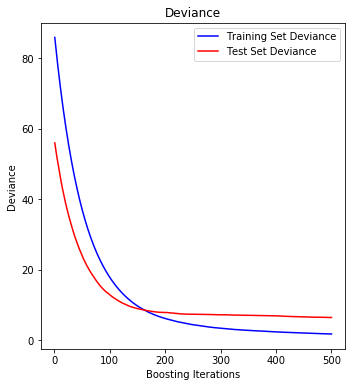

In [151]:
#Plot training deviance
# compute test set deviance

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

Plot feature importance

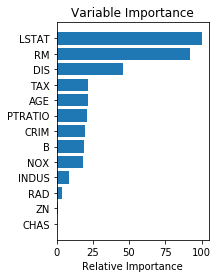

In [152]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Feature selection using SelectFromModel and LassoCV
http://scikit-learn.org/stable/auto_examples/feature_selection/plot_select_from_model_boston.html#sphx-glr-auto-examples-feature-selection-plot-select-from-model-boston-py

In [153]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

The Lasso is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer parameter values, effectively reducing the number of variables upon which the given solution is dependent. For this reason, the Lasso and its variants are fundamental to the field of compressed sensing. Under certain conditions, it can recover the exact set of non-zero weights (see Compressive sensing: tomography reconstruction with L1 prior (Lasso)).

Mathematically, it consists of a linear model trained with \ell_1 prior as regularizer. The objective function to minimize is:

\underset{w}{min\,} { \frac{1}{2n_{samples}} ||X w - y||_2 ^ 2 + \alpha ||w||_1}

The lasso estimate thus solves the minimization of the least-squares penalty with \alpha ||w||_1 added, where \alpha is a constant and ||w||_1 is the \ell_1-norm of the parameter vector.

In [154]:
clf = LassoCV()

# Set a minimum threshold of 0.25
sfm = SelectFromModel(clf, threshold=0.25)
sfm.fit(X, y)
n_features = sfm.transform(X).shape[1]


In [155]:
# Reset the threshold till the number of features equals two.
# Note that the attribute can be set directly instead of repeatedly
# fitting the metatransformer.
while n_features > 2:
    sfm.threshold += 0.1
    X_transform = sfm.transform(X)
    n_features = X_transform.shape[1]

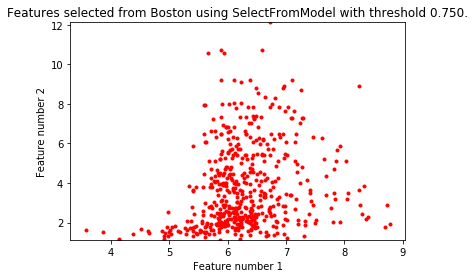

In [156]:
# Plot the selected two features from X.
plt.title(
    "Features selected from Boston using SelectFromModel with "
    "threshold %0.3f." % sfm.threshold)
feature1 = X_transform[:, 0]
feature2 = X_transform[:, 1]
plt.plot(feature1, feature2, 'r.')
plt.xlabel("Feature number 1")
plt.ylabel("Feature number 2")
plt.ylim([np.min(feature2), np.max(feature2)])
plt.show()